## Data Understanding

In [107]:
# Import library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
# Define pandas untuk membaca dataset
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")
links = pd.read_csv("ml-latest-small/links.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

In [6]:
# Menampilkan Dataframe Movies
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
# Menampilkan Dataframe ratings
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
# Menampilkan dataframe links
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [9]:
# Menampilkan dataframe tags
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


Observasi: Setelah dilakukan pemeriksaan dataset awal, dalam pembangungan sistem rekomendasi terdapat 6 file namun yang akan digunakan pada sistem ini hanya file 'movies.csv', 'ratings.csv', 'tags.csv'.

In [10]:
# Mengetahui sebaran informasi terhadap data Movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
# Mengetahui sebaran informasi terhadap data Ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
# Mengetahui sebaran informasi terhadap data Tags
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [13]:
# Dikarenakan 'timestamp' tidak digunakan maka akan dihapus
ratings = ratings.drop(columns=['timestamp'])
tags = tags.drop(columns=['timestamp'])

In [14]:
print('Banyak variasi genres: ', len(movies.genres.unique()))
print('Tipe genres: ', movies.genres.unique())

Banyak variasi genres:  951
Tipe genres:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama

In [15]:
print('Jumlah data pada Movies   : ', (movies.shape))
print('Jumlah data pada Tags    : ', (tags.shape))
print('Jumlah data pada Ratings  : ', (ratings.shape))
print('Jumlah data kolom movieId pada Movies   : ', len(movies.movieId.unique()))
print('Jumlah data kolom title pada Movies     : ', len(movies.title.unique()))
print('Jumlah data kolom genres pada Movies    : ', len(movies.genres.unique()))
print('Jumlah data kolom movieId pada Tags    : ', len(tags.movieId.unique()))
print('Jumlah data kolom userId pada Tags     : ', len(tags.userId.unique()))
print('Jumlah data kolom tag pada Tags        : ', len(tags.tag.unique()))
print('Jumlah data kolom userID pada Ratings  :', len(ratings.userId.unique()))
print('Jumlah data kolom movieId pada Ratings :', len(ratings.movieId.unique()))
print('Jumlah data Ratings :', len(ratings))

Jumlah data pada Movies   :  (9742, 3)
Jumlah data pada Tags    :  (3683, 3)
Jumlah data pada Ratings  :  (100836, 3)
Jumlah data kolom movieId pada Movies   :  9742
Jumlah data kolom title pada Movies     :  9737
Jumlah data kolom genres pada Movies    :  951
Jumlah data kolom movieId pada Tags    :  1572
Jumlah data kolom userId pada Tags     :  58
Jumlah data kolom tag pada Tags        :  1589
Jumlah data kolom userID pada Ratings  : 610
Jumlah data kolom movieId pada Ratings : 9724
Jumlah data Ratings : 100836


Observasi: Karena sebaran Informasi sudah diketahui, agar lebih baik pembacaan data yang disajikan, dilakukanlah penggabungan antara data movies dan ratings. Setelah itu digabungkan kembali dengan data Tags, Mengapa melakukan 2 kali pemrosesan dikarenakan penggabungan data yang pertama berdasarkan 'movieID' sedangkan yang kedua berdasarkan 'userId'

Namun, sebelum melakukan penggabungan berdasarkan ID. Data di cek terlebih dahulu apakah mempunyai value null didalamnya.

In [16]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [17]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [18]:
tags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

Observasi:
Ternyata hasil yang didapatkan pada dataset Tags terdapat nilai null namun tidak signifikan.a

Tidak luput juga data tersebut apakah mengandung duplicated data dengan menggunakan fungsi duplicated().sum()

In [19]:
movies.duplicated().sum()

0

In [20]:
ratings.duplicated().sum()

0

In [21]:
tags.duplicated().sum()

0

Setelah pengecheckan dasar tidak adanya data yang duplikat namun terdapat missing values, proses selanjutnya menggabungkan kedua dataset kita menjadi satu kesatuan berdasarkan 'movieID' terlebih dahulu baru 'userID'.

In [22]:
dataset = pd.merge(movies, ratings, on="movieId", how="left")
dataset

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
100851,193585,Flint (2017),Drama,184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


Observasi: Data yang disajikan sudah siap masuk kedalam tahap pre-processing lebih lanjut untuk digunakan sebagai solution approach yang sudah didefinisikan sebelumnya dengan informasi data berjumlah 1407563 dengan 5 kolom.

## Data Pre-processing

Sebelumnya setelah penggabungan dataframe, langkah selanjutnya akan ada penggabungan menggunakan fungsi numpy yaitu np.concatenate yang pertama berdasarkan 'movieId' dan kedua berdasarkan 'userId'. Hal ini dilakukan akan berdampak kepada Solution Approach yang sudah di definisikan di awal. 

In [23]:
all_movies = np.concatenate((
    movies.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
all_movies = np.sort(np.unique(all_movies))

print('Jumlah seluruh data film berdasarkan movieId: ', len(all_movies))

Jumlah seluruh data film berdasarkan movieId:  9742


In [24]:
all_users = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
all_users = np.sort(np.unique(all_users))

print('Jumlah seluruh data film berdasarkan userId: ', len(all_users))

Jumlah seluruh data film berdasarkan userId:  610


In [25]:
# Menggabungkan file title,genre,tags,userId ke dalam dataframe movieinfo
dataset_film = pd.concat([movies, tags, ratings])

# Menggabungkan dataframe rating dengan movieinfo berdasarkan nilai movieId
database_film = pd.merge(ratings, dataset_film, on=['movieId'], how='left')
database_film

,userId_x,movieId,rating_x,title,genres,userId_y,tag,rating_y
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,1,1,4.0,NaN,NaN,336.0,pixar,NaN
2,1,1,4.0,NaN,NaN,474.0,pixar,NaN
3,1,1,4.0,NaN,NaN,567.0,fun,NaN
4,1,1,4.0,NaN,NaN,1.0,NaN,4.0
...,...,...,...,...,...,...,...,...
6258744,610,168252,5.0,NaN,NaN,610.0,NaN,5.0
6258745,610,170875,3.0,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN
6258746,610,170875,3.0,NaN,NaN,50.0,NaN,1.0
6258747,610,170875,3.0,NaN,NaN,249.0,NaN,3.0


In [26]:
# Menghitung jumlah rating kemudian menggabungkannya berdasarkan movieId
database_film.groupby('movieId').sum()

,userId_x,rating_x,title,genres,userId_y,tag,rating_y
movieId,,,,,,,
1,14432976,184617.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...,181245.0
2,4168865,43412.5,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,fantasymagic board gameRobin Williamsgamefanta...,41525.0
3,811085,9322.5,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...,8814.0
4,12312,132.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,0,115.5
5,763308,7826.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,pregnancyremakepregnancyremakepregnancyremakep...,7374.5
...,...,...,...,...,...,...,...
193581,368,8.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,0,4.0
193583,368,7.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,0,3.5
193585,368,7.0,Flint (2017),Drama,184.0,0,3.5


In [27]:
all_film_rate = ratings
all_film_rate

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [28]:
all_film_name = pd.merge(
    all_film_rate, movies[['movieId', 'title', 'genres']], on='movieId', how='left')
all_film_name

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,Get Out (2017),Horror
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi


In [29]:
all_film = pd.merge(
    all_film_name, tags[['movieId', 'tag']], on='movieId', how='left')
all_film

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...
285757,610,168252,5.0,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,Logan (2017),Action|Sci-Fi,predictible plot


In [30]:
all_film.isnull().sum()

userId         0
movieId        0
rating         0
title          0
genres         0
tag        52549
dtype: int64

## Data Preparation

In [31]:
all_film_clean = all_film.dropna()
all_film_clean

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...
285756,610,168252,5.0,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,Logan (2017),Action|Sci-Fi,heartbreaking


In [32]:
all_film_clean.shape

(233213, 6)

In [33]:
# Mengurutkan resto berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_film
fix_film = all_film_clean.sort_values('movieId', ascending=True)
fix_film

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...
263644,586,187595,5.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


In [34]:
# Mengecek berapa jumlah fix_film
len(fix_film.movieId.unique())

1554

In [36]:
# Membuat variabel preparation yang berisi dataframe fix_film kemudian mengurutkan berdasarkan movieId
preparation = fix_film
preparation.sort_values('movieId')

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...
191470,414,187595,3.5,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


In [97]:
# Membuang data duplikat pada variabel preparation
preparation = fix_film.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...
27632,62,183611,4.0,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


In [41]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
prepare_moviesId = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
prepare_titles = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
prepare_genres = preparation['genres'].tolist()

# Mengonversi data series ‘tag’ menjadi dalam bentuk list
prepare_tags = preparation['tag'].tolist()

print(len(prepare_moviesId))
print(len(prepare_titles))
print(len(prepare_genres))
print(len(prepare_tags))

1554
1554
1554
1554


In [42]:
# Membuat dictionary untuk data ‘movieId’, ‘title’, 'genres' dan ‘tag’

dataset_film_new = pd.DataFrame({
    'id': prepare_moviesId,
    'title': prepare_titles,
    'genres': prepare_genres,
    'tags': prepare_tags
})
dataset_film_new

,id,title,genres,tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,old
3,5,Father of the Bride Part II (1995),Comedy,pregnancy
4,7,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


## Solution Approach

### Content-Based Filtering

In [43]:
# Membuat dictionary untuk data ‘movieId’, ‘title’, 'genres' dan ‘tag’

movies_content = pd.DataFrame({
    'id': prepare_moviesId,
    'title': prepare_titles,
    'genres': prepare_genres,
    'tags': prepare_tags
})
movies_content

,id,title,genres,tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,old
3,5,Father of the Bride Part II (1995),Comedy,pregnancy
4,7,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genres
tf.fit(movies_content['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [46]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(movies_content['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1554, 24)

In [47]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

In [48]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genres
# Baris diisi dengan title film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movies_content['title']
).sample(22, axis=1).sample(10, axis=0)

,no,horror,adventure,imax,genres,musical,documentary,animation,listed,children,...,noir,fi,thriller,film,fantasy,mystery,romance,drama,sci,action
title,,,,,,,,,,,,,,,,,,,,,
Paddington (2014),0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.875445,...,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Wall Street (1987),0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
Akira (1988),0.0,0.000000,0.405316,0.0,0.0,0.0,0.0,0.531654,0.0,0.000000,...,0.0,0.44606,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.44606,0.393858
"Fish Called Wanda, A (1988)",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Dead Again (1991),0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.529096,0.0,0.000000,0.687161,0.497863,0.000000,0.00000,0.000000
Lady in the Water (2006),0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.683058,0.664780,0.000000,0.302488,0.00000,0.000000
Jaws 3-D (1983),0.0,0.799338,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.600882
One Flew Over the Cuckoo's Nest (1975),0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
What If (2013),0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.690993,0.433964,0.00000,0.000000


Observasi:

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

In [50]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=movies_content['title'], columns=movies_content['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


title,"Bachelor and the Bobby-Soxer, The (1947)",Grown Ups 2 (2013),Henry V (1989),Yankee Doodle Dandy (1942),"Commitments, The (1991)"
title,,,,,
Frank (2014),0.483077,0.483077,0.099321,0.135765,0.337096
Sabrina (1995),0.641674,0.641674,0.334487,0.000000,0.286387
"Talk of the Town, The (1942)",0.497380,0.497380,0.259271,0.000000,0.221987
Hope and Glory (1987),0.000000,0.000000,0.273890,0.374389,0.335032
That Thing You Do! (1996),0.799743,0.799743,0.164428,0.224762,0.558069
Broadcast News (1987),0.578103,0.578103,0.420208,0.162471,0.403407
"Official Story, The (La historia oficial) (1985)",0.000000,0.000000,0.273890,0.374389,0.335032
More (1998),0.000000,0.000000,0.054352,0.074296,0.066486
Mean Creek (2004),0.000000,0.000000,0.139344,0.190474,0.170451


In [72]:
def content_based_filtering(title, similarity_data=cosine_sim_df, items=movies_content[['title', 'genres']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:, title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [78]:
movies_content[movies_content.title.eq('Deadpool 2 (2018)')]

,id,title,genres,tags
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm


In [79]:
# Memberikan rekomendasi film berdasarkan content-based filtering
content_based_filtering('Deadpool 2 (2018)')

,title,genres
0,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
1,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi
2,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,Terminator 2: Judgment Day (1991),Action|Sci-Fi
4,Logan (2017),Action|Sci-Fi


### Collaborative-Based Filtering

In [124]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [125]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = ratings['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [126]:
# Mengubah movieId menjadi list tanpa nilai yang sama
moveis_ids = ratings['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movies_to_movies_encoded = {x: i for i, x in enumerate(moveis_ids)}

# Melakukan proses encoding angka ke movieId
movies_encoded_to_movies = {i: x for i, x in enumerate(moveis_ids)}

In [127]:
# Mapping userId ke dataframe user
ratings['user'] = ratings['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
ratings['movie'] = ratings['movieId'].map(movies_to_movies_encoded)

In [128]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movies
num_movies = len(movies_encoded_to_movies)
print(num_movies)

# Mengubah rating menjadi nilai float
ratings['rating'] = ratings['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(ratings['rating'])

# Nilai maksimal rating
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Movies: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Movies: 9724, Min Rating: 0.5, Max Rating: 5.0


In [130]:
# Mengacak dataset
df_colabol = ratings.sample(frac=1, random_state=42)
df_colabol

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [131]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df_colabol[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df_colabol['rating'].apply(lambda x: (x - min_rating) /
                       (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_colabol.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [132]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_film, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_film = num_film
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(  # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(
        num_users, 1)  # layer embedding user bias
    self.film_embedding = layers.Embedding(  # layer embeddings film
        num_film,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.film_bias = layers.Embedding(
        num_film, 1)  # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(
        inputs[:, 0])  # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0])  # memanggil layer embedding 2
    film_vector = self.film_embedding(
        inputs[:, 1])  # memanggil layer embedding 3
    film_bias = self.film_bias(inputs[:, 1])  # memanggil layer embedding 4

    dot_user_film = tf.tensordot(user_vector, film_vector, 2)

    x = dot_user_film + user_bias + film_bias

    return tf.nn.sigmoid(x)  # activation sigmoid

In [133]:
model = RecommenderNet(num_users, num_movies, 50)  # inisialisasi model

# model compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [135]:
# Memulai training

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6385 - root_mean_squared_error: 0.2271 - val_loss: 0.6311 - val_root_mean_squared_error: 0.2252
Epoch 2/100
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6226 - root_mean_squared_error: 0.2174 - val_loss: 0.6186 - val_root_mean_squared_error: 0.2121
Epoch 3/100
1261/1261 [==============================] - 13s 10ms/step - loss: 0.6156 - root_mean_squared_error: 0.2100 - val_loss: 0.6155 - val_root_mean_squared_error: 0.2089
Epoch 4/100
1261/1261 [==============================] - 15s 12ms/step - loss: 0.6114 - root_mean_squared_error: 0.2055 - val_loss: 0.6144 - val_root_mean_squared_error: 0.2078
Epoch 5/100
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6100 - root_mean_squared_error: 0.2038 - val_loss: 0.6132 - val_root_mean_squared_error: 0.2064
Epoch 6/100
1261/1261 [==============================] - 12s 10ms/step - loss: 0.6078 - root_mean_squared_error: 0.

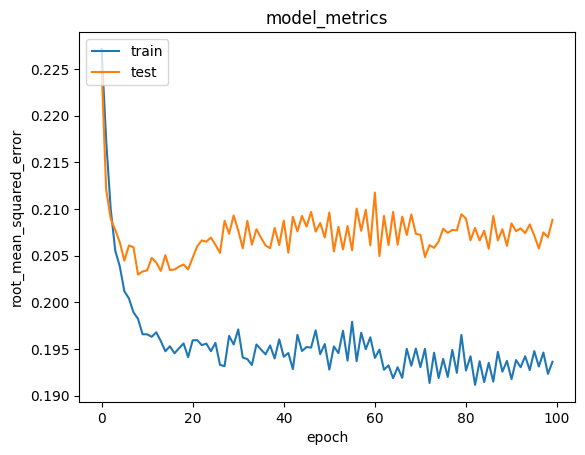

In [136]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
movies_df = movies_content
df = pd.read_csv('ml-latest-small/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
film_choices_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movies_not_watched = movies_df[~movies_df['id'].isin(
    film_choices_by_user.userId.values)]['id']
movies_not_watched = list(
    set(movies_not_watched)
    .intersection(set(movies_to_movies_encoded.keys()))
)

movies_not_watched = [
    [movies_to_movies_encoded.get(x)] for x in movies_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_film_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

In [140]:
ratings = model.predict(user_film_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_film_ids = [
    movies_encoded_to_movies.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Film with high ratings from user')
print('----' * 8)

top_film_user = (
    film_choices_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

film_df_rows = movies_df[movies_df['id'].isin(top_film_user)]
for row in film_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 film recommendation')
print('----' * 8)

recommended_film = movies_df[movies_df['id'].isin(recommended_film_ids)]
for row in recommended_film.itertuples():
    print(row.title, ':', row.genres)

49/49 [==============================] - 0s 1ms/step
Showing recommendations for users: 474
Film with high ratings from user
--------------------------------
Enchanted April (1992) : Drama|Romance
Strictly Ballroom (1992) : Comedy|Romance
Moonstruck (1987) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Harry Potter and the Goblet of Fire (2005) : Adventure|Fantasy|Thriller|IMAX
--------------------------------
Top 10 film recommendation
--------------------------------
Paths of Glory (1957) : Drama|War
Last Days of Disco, The (1998) : Comedy|Drama
Two Family House (2000) : Drama
Hope and Glory (1987) : Drama
Midnight Clear, A (1992) : Drama|War
Woman Under the Influence, A (1974) : Drama
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Reefer Madness: The Movie Musical (2005) : Comedy|Drama|Musical
Paterson : (no genres listed)
